In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Imagine for a moment a weather forecaster says that her accuracy to predict the rain is aproximately 75%.  Is this an absolute probability?  Rather not:  the forecaster will use available data and then will make her forecast.  The data on the other hand is subject to measuring incertanity and additionally the model might not be the right one.  
The better expression is then to say that forecaster is aproximately correct in 75% cases when using her model and acquired data.  This sounds like a conditional probability:

$P( \text{ Rain Forecast | Rain Data } ) = 0.75$

On the other hand the forcaster claims her model is 99% specific, which means 1% of making an error if the data points to a sunny day:

$P( \text{ Rain Forecast | Sunny Data } ) = 0.01$

What would be a probability of rainy day then?  Let's say that initial estimates show that rainy day is ony 10% probable.  Let's use total probability formula then:

$P( \text{Rainy | Rain Forecast} ) = \frac{P( \text{ Rain Forecast | Rain Data })P( \text{ Rain } )}{P( \text{ Rain Forecast | Rain Data } )P( \text{ Rain }) + P( \text{ Rain Forcast | Sunny Data })P( \text{ Sunny } ) }$


In [2]:
def p_rainy_forecast( p_forecast_data, p_incorrectforecast_data, p_rainy ):
    p = p_forecast_data * p_rainy / ( p_forecast_data * p_rainy + (1.0-p_rainy) * p_incorrectforecast_data )
    return p

Plugging the numbers, we get the following chance of rainy as predicted by the forecster:

In [3]:
p_rainy_forecast( 0.75, 0.10, 0.10 )

0.45454545454545453

This sounds kind of low.  Only 45% chance of an accurate forecast of rain. Let's take a look how the accuracy will change as a function of forecast performance:

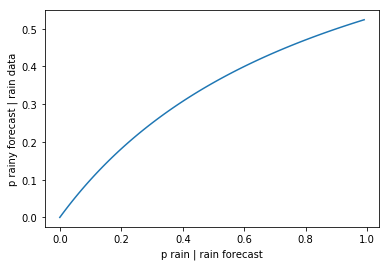

In [4]:
p_forecast_data = np.arange( 0.0, 1.0, 0.01 )

fp_rainy_forecast = np.vectorize( lambda x: p_rainy_forecast( x, 0.10, 0.1 ) )
p_rainy_forecast_ = fp_rainy_forecast( p_forecast_data )

plt.plot( p_forecast_data, p_rainy_forecast_ )
plt.xlabel( 'p rain | rain forecast' )
plt.ylabel( 'p rainy forecast | rain data' )

Even if forecaster sensitivity approaches 100%, the accuracy of the test is not improving significantly.  Let's take a look then at the specificy of the forecast

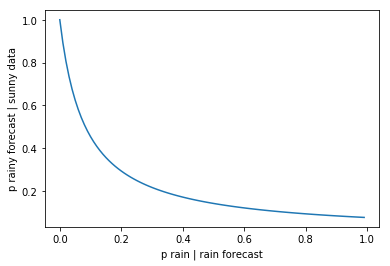

In [5]:
p_forecast_data = np.arange( 0.0, 1.0, 0.01 )

fp_rainy_forecast = np.vectorize( lambda x: p_rainy_forecast( 0.75, x, 0.1 ) )
p_rainy_forecast_ = fp_rainy_forecast( p_forecast_data )

plt.plot( p_forecast_data, p_rainy_forecast_ )
plt.xlabel( 'p rain | rain forecast' )
plt.ylabel( 'p rainy forecast | sunny data' )

If the sensitivity (probability of true negative) of the test improves, it then dramatically improves the accuracy of the test.  Sounds like our forecaster needs to reduce the number of errors the forecast makes. 